In [1]:
m1_lines = [line.rstrip('\n') for line in open('./pybenchmark_m1.txt')]
m1_data = {}
for l in m1_lines:
    if "###" in l:
        header = l.strip("# ")
    elif len(l)>1:
        timing = l.split(":")[-1].split("+-")[0].strip()
        if "ms" in timing:
            timing = float(timing.replace(" ms", ""))
        elif "us" in timing:
            timing = float(timing.replace(" us", ""))/1000
        elif "ns" in timing:
            timing = float(timing.replace(" ns", ""))/(1e6)
        m1_data[header] = timing
        
ryzen_lines = [line.rstrip('\n') for line in open('./pybenchmark_5600x.txt')]
ryzen_data = {}
for l in ryzen_lines:
    if "###" in l:
        header = l.strip("# ")
    elif len(l)>1:
        timing = l.split(":")[-1].split("+-")[0].strip()
        if "ms" in timing:
            timing = float(timing.replace(" ms", ""))
        elif "us" in timing:
            timing = float(timing.replace(" us", ""))/1000
        elif "ns" in timing:
            timing = float(timing.replace(" ns", ""))/(1e6)
        ryzen_data[header] = timing

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

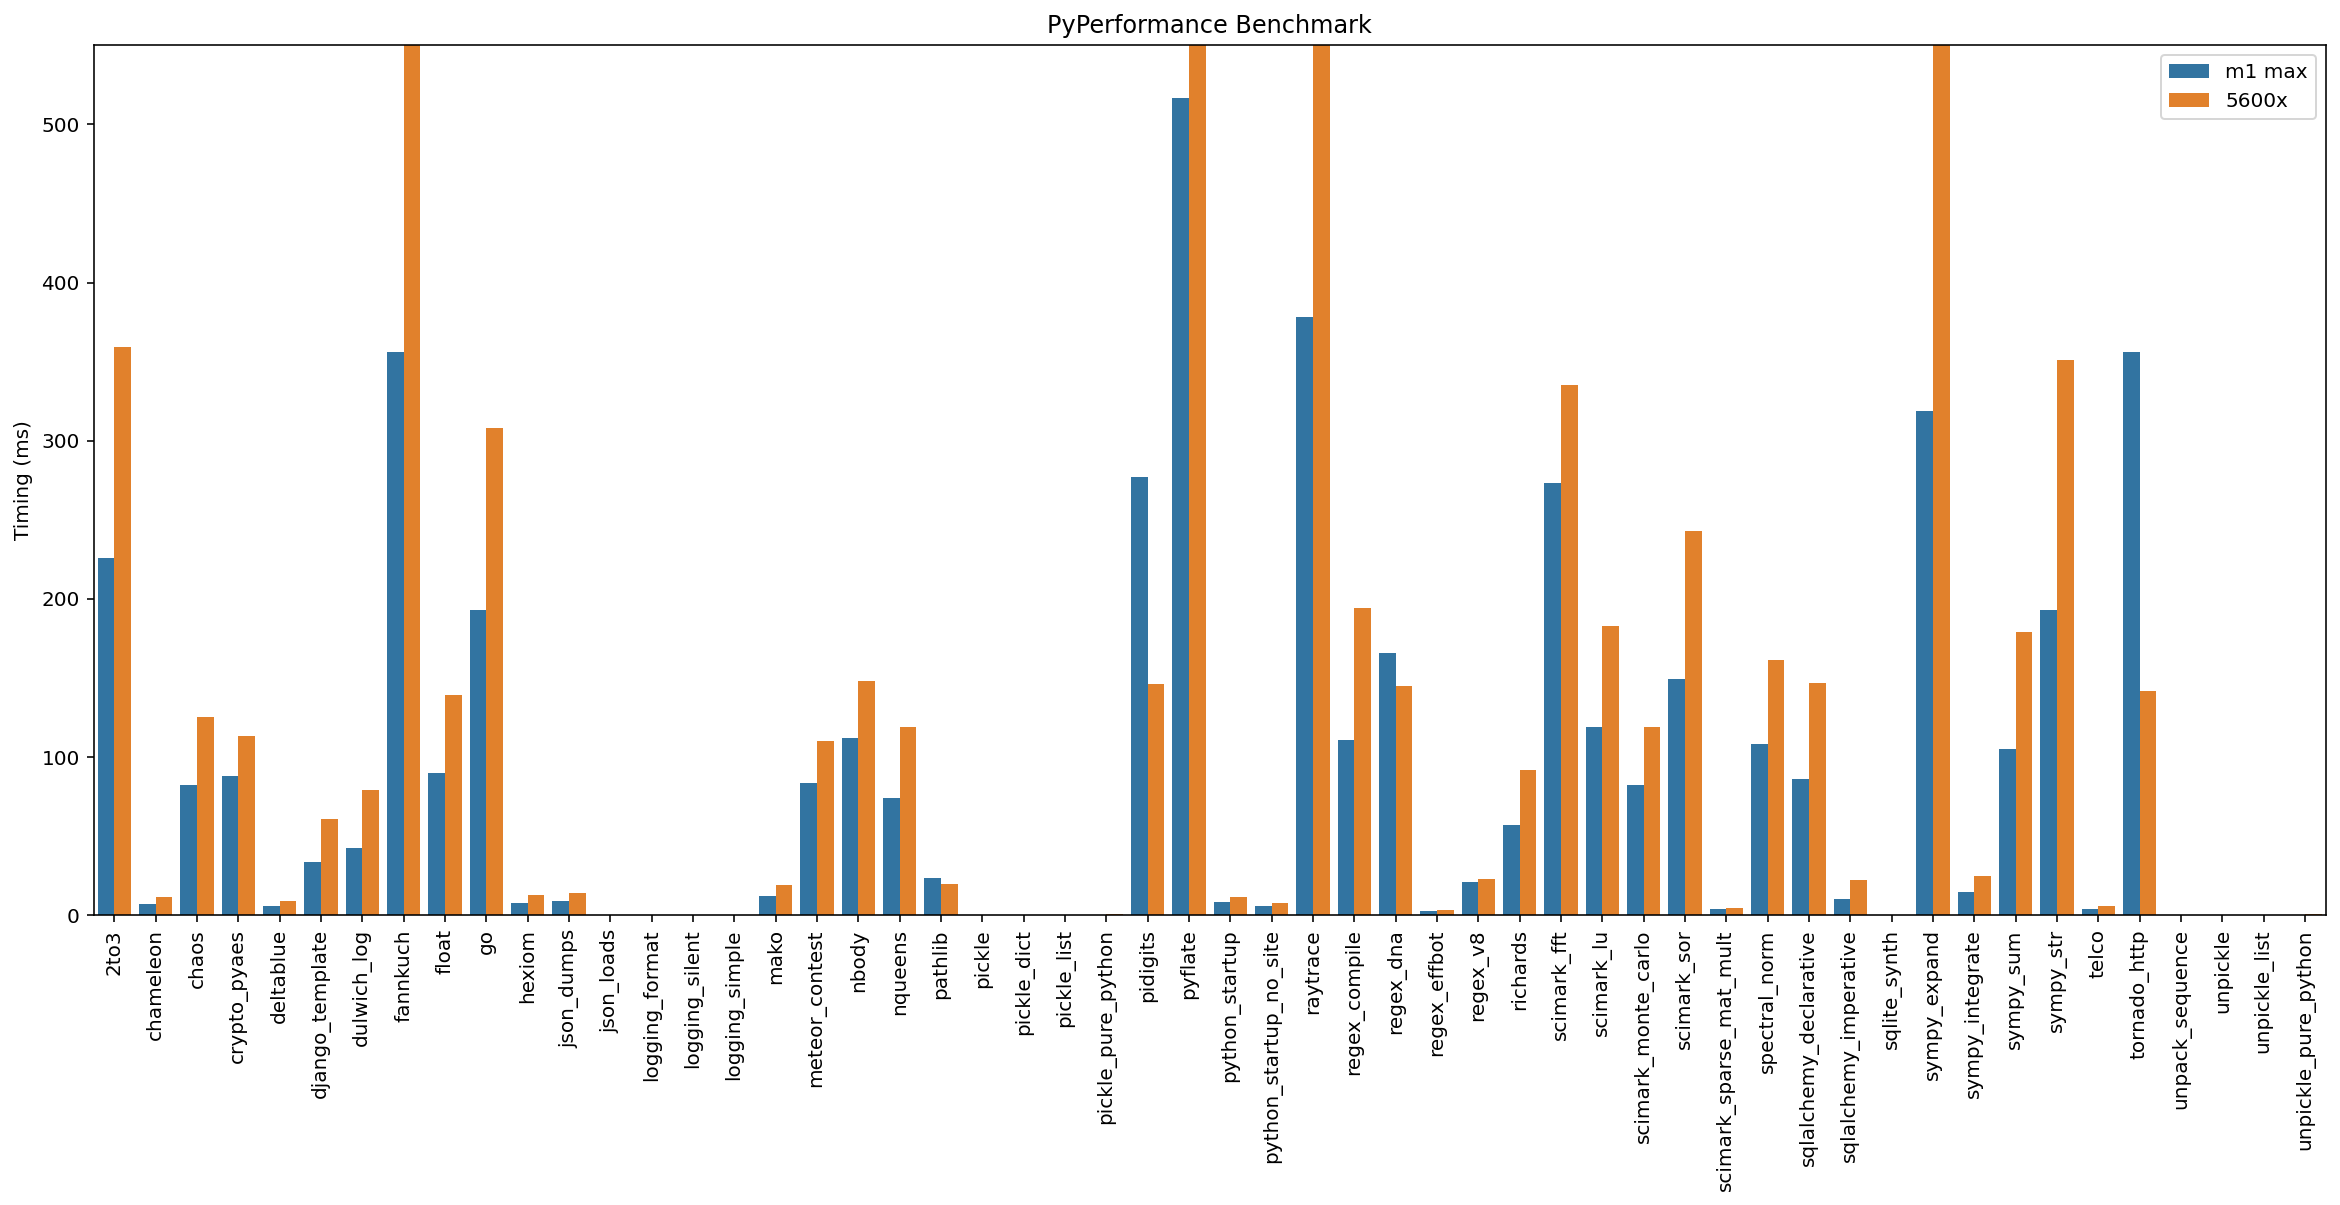

In [3]:
keys = list(m1_data.keys())
m1_vals = [float(m1_data[k]) for k in keys]
ryzen_vals = [float(ryzen_data[k]) for k in keys]
keys = keys+keys
vals = m1_vals+ryzen_vals
hues = len(m1_vals)*["m1 max"]+len(ryzen_vals)*["5600x"]
plt.figure(figsize=(20,8))
sns.barplot(x=keys, y=vals, hue=hues)
plt.title("PyPerformance Benchmark")
plt.xticks(rotation=90)
plt.ylabel("Timing (ms)")
plt.ylim([0,550])
plt.show()

In [4]:
m1_total = 0
ryzen_total = 0
for key in m1_data.keys():
    m1_total += m1_data[key]
    ryzen_total += ryzen_data[key]
    
diff = m1_total/ryzen_total

In [5]:
diff

0.7009132266784613